# Cell Automata Jupyter Notebook  
  
__June 2017__  
  
*Gustavo A. Patino*  
  
gapatino@oakland.edu  
https://github.com/gapatino/Cell-Automata-in-Jupyter-Notebook

This notebook includes functions to run cell automata models inside the Jupyter Notebook  
The evolution of the system is stored in a 3D matrix, where each 2D matrix is one time step

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Model Parameters  
List of parameters that can be changed to alter the output of the notebook

In [2]:
# Number of row and columns in the matrix
nrows = 200
# Number of maximum iterations
maxiters = 500
# Radius of neighbors that affect the value of the current cell (radius of 1 means that only the 8 cells immediately 
# adjacent have influence)
radius = 1
# How many steps of the evolution of the system behavior will be shown
nshows = 6
# How do we handle the matrix borders: 'fix' keeps the values on first and last rows and columns constant, 
#                                      'wrap' wraps the first and last rows and columns around 
borders='fix'

The<code> makematrix()</code> function takes as argument the number of rows and columns of the matrix to model  
(the code only allows a square matrix) and randomly assigns each cell to one of two possible states.  
The returned matrix will be the initial condition of the model

In [3]:
def makematrix(nrows):
    listrand = [] #the empty list will contain all the values for the initial matrix
    for i in range(nrows*nrows):
        listrand.append(np.random.randint(0,2)) # By changing the 2 you allow for the existence of more states
    # Turn the list into a square matrix
    listrand = np.matrix(listrand)
    listrand.shape=(nrows,nrows)
    return listrand

The<code> showmatrix()</code> function takes as arguments: the matrix to display, the number of rows and columns  
(so it can display the max value of the axis), and the iteration number (which will be displayed in the figure title).  
Its objective is then to display the values of the matrix as a grid, which is achieved by using the
<code> plt.imshow()</code> function

In [4]:
def showmatrix(listrand, nrows, i):
    plt.imshow(listrand) # imshow() displays the matrix values as a grid
    plt.xticks([0, nrows])
    plt.yticks([0, nrows])
    plt.title('Iteration: ' + str(i))
    plt.show()
    return

### Simulation Function  
The<code> systemsym()</code> function is the heart of the notebook. It is the one that will run the cell automata according to an  
update algorithm until the system converges.  
The function takes as arguments: the number of rows and columns of the 2D matrices to simulate, the maximum   
number of iterations to run, the radius of neighbors that will influence the updated value of each cell,  
how many steps in the simulation we'll display to illustrate said the evolution of the system, and how the  
borders of matrix will be handled during the update. These are all the parameters declared at the beginning  
of the notebook.
The function will simulate the evolution of the system as a collection of 2D matrices (one per each  
time step in the simulation) stored in a 3D matrix. Once the simulation finishes the function
<code> showmatrices()</code>  
is invoked to display a selection of the generated 2D matrices  
The function will return the 3D matrix and the number of iterations that it took to reach convergence

In [5]:
def systemsym(nrows, maxiters, radius, nshows, borders):
    # Variable that holds the while condition
    cellschanged = 1
    # Initialize iteration counter
    niters = 0
    # Create a 3D matrix of size maxiters * nrows * nrows that will hold the evolution of the system
    # each nrows * nrows matrix will hold the values of the matrix at a single iteration
    matrixevo = np.zeros((maxiters,nrows,nrows))
    # The first 2D matrix in matrixevo is initialized with random assignation of each cell to a given group
    # by invoking the makematrix() function
    matrixevo[0]=makematrix(nrows)

    # Because we don't know how many iterations the system needs to undergo before reaching convergence we will
    # perform the updates within a while loop that depends on the value of the cellschanged variable
    while cellschanged>0:
        niters= niters + 1
        # Start with a matrix which is a copy of the one from the previous time step and then update each cell
        matrixevo[niters] = np.copy(matrixevo[niters-1])
        # Cycle through each cell in the current matrix to determine its new value, but the start and end places
        # to cycle will depend on the way the borders are handled
        cycle_handler = {'wrap':0, 'fix':radius}
        for row in range(cycle_handler[borders] , nrows-cycle_handler[borders]):
            for column in range(cycle_handler[borders] , nrows-cycle_handler[borders]):
                # This section is where the update algorithm is defined, change it to your specific model
                # Currently it just runs a majority vote based on the local neighbors depending on the radius value
                votes = 0
                for deltarow in np.arange(-radius, radius+1):
                    for deltacolumn in np.arange(-radius, radius+1):
                        votes = votes + matrixevo[niters-1 , (row+deltarow)%nrows , (column+deltacolumn)%nrows]
                # Then update the value of the current cell based on the number of votes
                # The number of neighboring cells evaluated depends on the radius
                ncells_eval = (radius + 2 + (radius-1))**2
                if votes>np.floor(ncells_eval/2):
                    matrixevo[niters,row,column]=1
                else:
                    matrixevo[niters,row,column]=0
        # We only want to iterate until the cells stop changing value or we reach the maximum number of iterations
        # calculate how many cells changed value, if any did cellschanged will remain higher than 0
        cellschanged = np.abs(np.sum(np.sum(matrixevo[niters]-matrixevo[niters-1])))
        # Check if we reached the maximum number of iterations
        if niters==maxiters:
            cellschanged=0
            
    print('Finished after ', niters, ' iterations')
    
    # Call the showmatrices() function to display the evolution of the system (see function definition below)
    showmatrices(matrixevo, nrows, niters, nshows)
    
    return matrixevo, niters

The<code> showmatrices()</code> function takes as arguments: the 3D matrix with the system evolution (and from which we will only  
show a subset of the 2D matrices to illustrate such evolution), the number of rows and columns of the 2D matrices,  
the number of iterations the system took to converge (i.e. how many of the 2D matrices in<code> matrixevo</code> contain simulation  
results), and how many of those 2D matrices in<code> matrixevo</code>  we'll display to illustrate the evolution 
of the system.  
<code>showmatrices()</code> selects which (almost) evenly-space 2D matrices from <code> matrixevo</code> to display and plots each by  
invoking the<code> showmatrix()</code> function

In [6]:
def showmatrices(matrixevo, nrows, niters, nshows):
    # calculate what step size would you need for the desired amount of displays
    # If the simulation converged in less steps that the maximum amount of steps we want to show, then show them all
    if niters < nshows:
        for i in range(niters+1):
            showmatrix(matrixevo[i], nrows, i)
    else:
        _ , step_size = np.linspace(0, niters, nshows, retstep=True)
        step_size = np.ceil(step_size) # step_size needs to be an integer and can't be 0
        for i in range(0, niters+1, int(step_size)):
            showmatrix(matrixevo[i], nrows, i)
    # add the final step, which is usually not included in the stepping counting
    if i<niters:
        showmatrix(matrixevo[niters], nrows, niters)
    return

### Running the model  
To run the simulation simply invoke the systemsym function.  
In addition to displaying the results of selected time steps it will also return the 3D matrix containing  
the results from each time step and the number of iterations that it took to reach convergence

Finished after  31  iterations


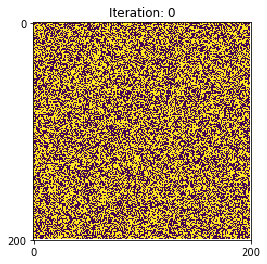

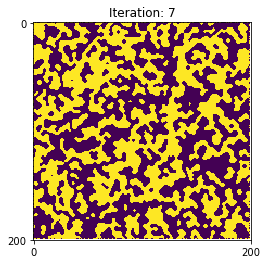

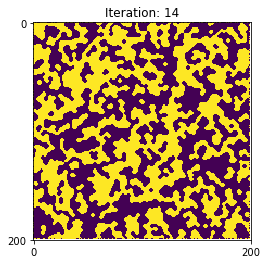

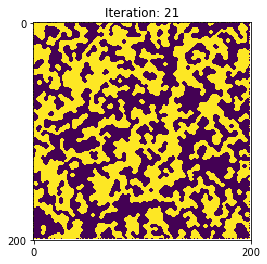

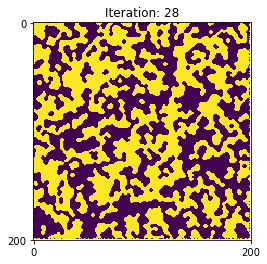

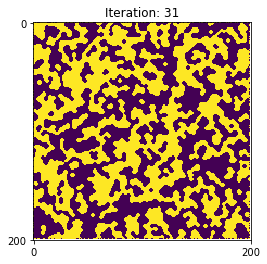

In [7]:
matrixevo1, niters1 = systemsym(nrows, maxiters, radius, nshows, borders)

Finished after  26  iterations


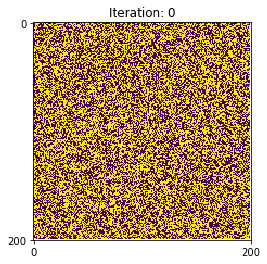

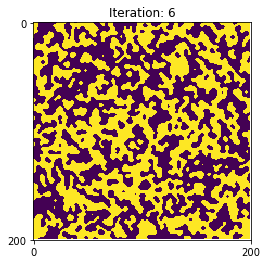

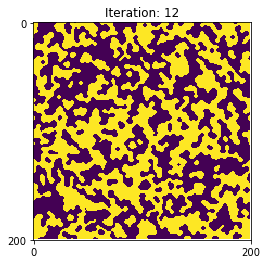

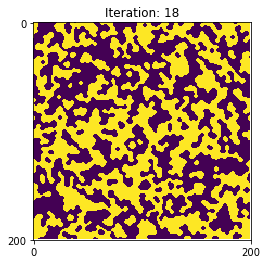

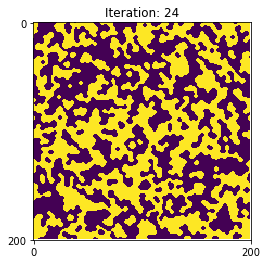

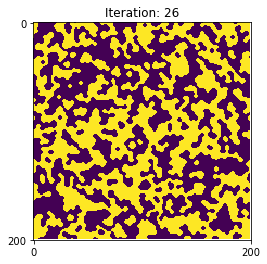

In [8]:
borders='wrap'
matrixevo2, niters2 = systemsym(nrows, maxiters, radius, nshows, borders)

Because the 3D matrix with all simulated steps was returned, it is possible to access an individual time step 

In [9]:
matrixevo1[10] # 2D matrix with the state of the system at the 10th time step

array([[ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  1.,  1.]])

The general format to access specific rows and columns in a time step is:  
<code>matrixevo[ <i>time_step</i>, <i>row(s)</i>, <i>column(s)</i> ]</code>

In [10]:
matrixevo2[niters2,2,:]

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

We can check that in the case of fixed borders the first column didn't change between the initial and last iteration

In [11]:
matrixevo1[0,0,:]-matrixevo1[niters1,0,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

While that is not the case for the wrapped borders

In [12]:
matrixevo2[0,0,:]-matrixevo2[niters2,0,:]

array([ 0.,  0.,  0., -1., -1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0., -1.,  0., -1., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -1., -1.,  0.,  0., -1.,  0., -1., -1.,  0., -1.,  0., -1.,
       -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,
        0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
        0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -1.,  0., -1., -1.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0., -1.,
       -1.,  0., -1., -1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0., -1.,  1.,  0.,  0.,
        0.,  1.,  0., -1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0

### But animations would be better  
Obviously, an animation of the system evolution would be preferable. However, I was unable to make  
that work using the matplotlib.animation functions FuncAnimation or ArtistAnimation.  
If you are able to do it please feel free to fork and modify the code